In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Asjusts the configuration of the plots we will create


# Read in the data
df = pd.read_csv(r'C:\Users\Alex\Coding\Data_Analysis\_Projects\AlexTheAnalyst\dataset\movies.csv')

In [2]:
# Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Let's see if there is any missing data in each columns

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
df.isnull().any()

name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool

In [6]:
# Cleaning null values to column budget and gross
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)
df['runtime'] = df['runtime'].fillna(0)
df['votes'] = df['votes'].fillna(0)

In [7]:
# Modyfing type of columns vudget and gross
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [11]:
df['released'] = df['released'].astype(str)

In [12]:
# Find substring in between 2 characters and create a column with the substring
df['released_split_year'] = df['released'].apply(lambda st: st[st.find(",")+1:st.find("(")].strip())
df['released_split_month'] = df['released'].apply(lambda st: st[:st.find(" ")].strip())
df['released_split_location'] = df['released'].apply(lambda st: st[st.find("(")+1:st.find(")")].strip())

In [13]:
#df = df.drop(['released_split_year'], axis=1)

In [14]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [15]:
pd.set_option('display.max_rows', None)

In [16]:
# Drop any duplicates

# df['company'].drop_duplicates().sort_values(ascending=False)

# df.drop_duplicates()

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_split_year,released_split_month,released_split_location
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009,December,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019,April,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997,December,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015,December,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018,April,United States


In [19]:
# Is budget high correlated with gross?
# Os company high correlated with gross?

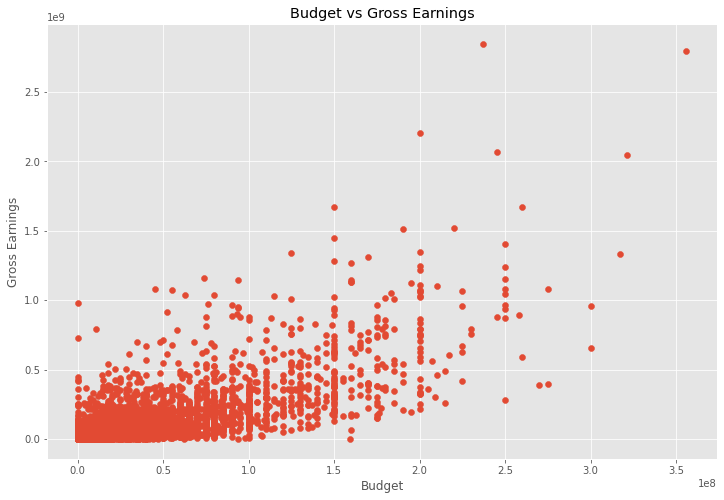

In [20]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

plt.show()

In [21]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_split_year,released_split_month,released_split_location
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009,December,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019,April,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997,December,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015,December,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018,April,United States


<AxesSubplot:xlabel='budget', ylabel='gross'>

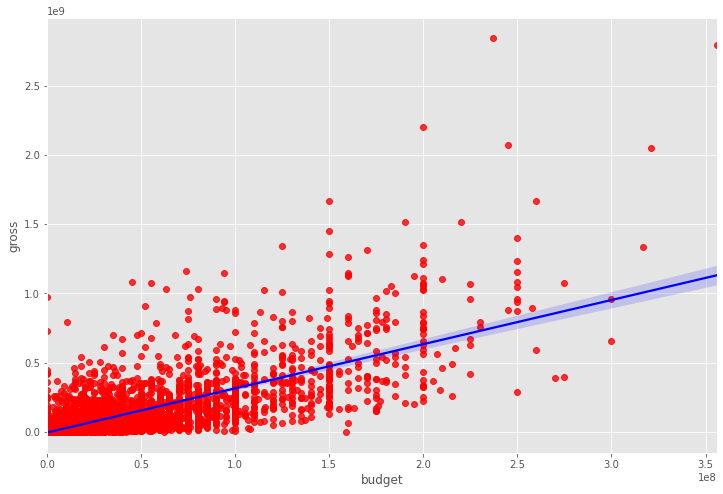

In [22]:
# Plot Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"},  line_kws={"color":"blue"})

In [23]:
# Let's start looking at correlation (pearson = default)
df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.116358
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.398387
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.398387,0.306984,0.268372,0.244339,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

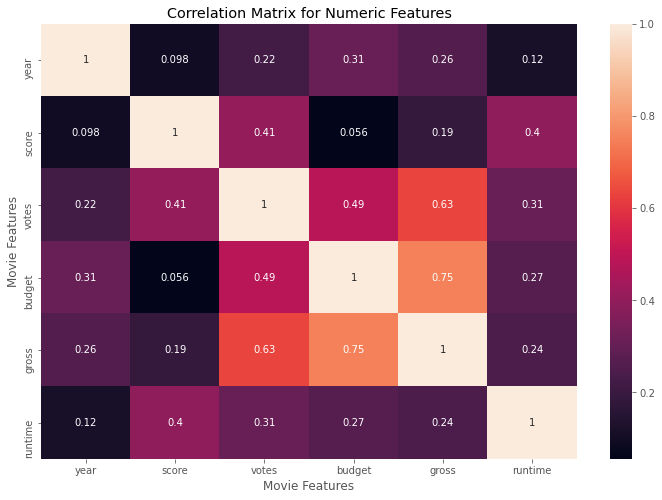

In [24]:
# High correlation between budget and gross

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show

In [28]:
# "Numerize" nominal data

df_numerized = df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [29]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_split_year,released_split_month,released_split_location
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,29,10,56
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,39,8,56
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,17,10,56
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,35,10,56
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,38,8,56


In [30]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_split_year,released_split_month,released_split_location
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,29,10,56
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,39,8,56
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,17,10,56
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,35,10,56
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,38,8,56


<function matplotlib.pyplot.show(close=None, block=None)>

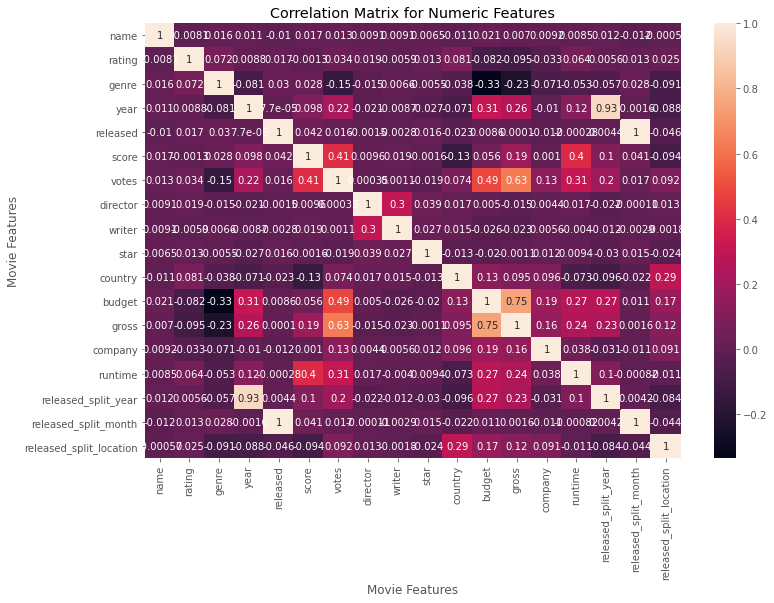

In [31]:
# High correlation between budget and gross

correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show

In [32]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_split_year,released_split_month,released_split_location
name,1.000000,-0.008069,0.016355,0.011453,-0.010480,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,0.012090,-0.011725,-0.000569
rating,-0.008069,1.000000,0.072423,0.008779,0.017208,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.005608,0.013475,0.025061
genre,0.016355,0.072423,1.000000,-0.081261,0.030429,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,-0.057271,0.028397,-0.090843
year,0.011453,0.008779,-0.081261,1.000000,0.000077,0.097995,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,0.933844,-0.001562,-0.088273
released,-0.010480,0.017208,0.030429,0.000077,1.000000,0.042148,0.015935,-0.001526,-0.002784,0.015805,-0.023408,0.008552,0.000100,-0.012269,-0.000281,0.004448,0.995320,-0.046152
score,0.017097,-0.001314,0.027965,0.097995,0.042148,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.398387,0.104129,0.040993,-0.094147
votes,0.013038,0.033743,-0.145296,0.222427,0.015935,0.409182,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.196743,0.017107,0.092341
director,0.009079,0.019483,-0.015258,-0.020795,-0.001526,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.022270,-0.000105,0.013293
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002784,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.011582,-0.002892,-0.001848
star,0.006472,0.013405,-0.005477,-0.027242,0.015805,-0.001609,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,-0.030243,0.015406,-0.023568


In [33]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name                     name                       1.000000
                         rating                    -0.008069
                         genre                      0.016355
                         year                       0.011453
                         released                  -0.010480
                         score                      0.017097
                         votes                      0.013038
                         director                   0.009079
                         writer                     0.009081
                         star                       0.006472
                         country                   -0.010737
                         budget                     0.020548
                         gross                      0.006989
                         company                    0.009211
                         runtime                    0.008483
                         released_split_year        0.012090
                        

In [34]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget                   genre                     -0.334021
genre                    budget                    -0.334021
gross                    genre                     -0.234297
genre                    gross                     -0.234297
votes                    genre                     -0.145296
genre                    votes                     -0.145296
country                  score                     -0.133348
score                    country                   -0.133348
country                  released_split_year       -0.096381
released_split_year      country                   -0.096381
gross                    rating                    -0.095450
rating                   gross                     -0.095450
score                    released_split_location   -0.094147
released_split_location  score                     -0.094147
genre                    released_split_location   -0.090843
released_split_location  genre                     -0.090843
year                    

In [35]:
high_pos_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_pos_corr

votes                    gross                      0.632870
gross                    votes                      0.632870
budget                   gross                      0.750157
gross                    budget                     0.750157
released_split_year      year                       0.933844
year                     released_split_year        0.933844
released                 released_split_month       0.995320
released_split_month     released                   0.995320
name                     name                       1.000000
released_split_year      released_split_year        1.000000
rating                   rating                     1.000000
genre                    genre                      1.000000
year                     year                       1.000000
released                 released                   1.000000
score                    score                      1.000000
votes                    votes                      1.000000
released_split_month    

In [36]:
high_neg_corr = sorted_pairs[(sorted_pairs) < -0.5]
high_neg_corr

Series([], dtype: float64)

In [37]:
# Votes and budget have the highest correlation to gross earnings
# company has low correlation
